1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


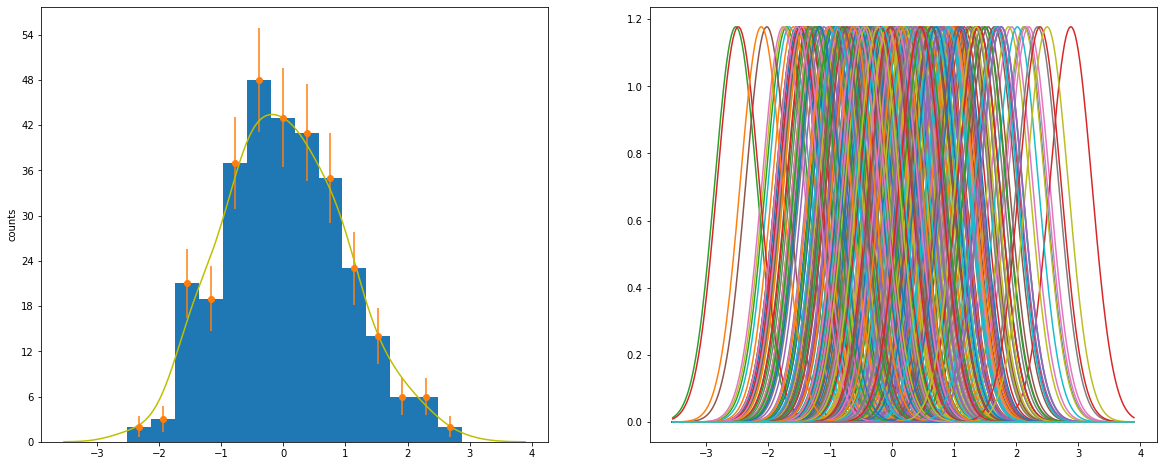

In [1]:
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import numpy as np
N = 300
mean = 0
std = 1
x = np.random.normal(loc=mean, scale=std, size=N)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

n, left_bins, _ = ax[0].hist(x, bins="auto")
bins = (left_bins[:-1] + left_bins[1:]) / 2

ax[0].errorbar(bins, n, yerr=n**(0.5), fmt='o')
ax[0].set_ylabel("counts")
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))

#create gaussians for every x
std_gaus = 1.06*std*N**(-1/5)
x_gaus = np.linspace(x.min()-3*std_gaus,x.max()+3*std_gaus,N)
gaussians = np.zeros(len(x_gaus))

for mean_gaus in x:
    gaussian = norm.pdf(x_gaus, loc=mean_gaus, scale=std_gaus)
    gaussians += gaussian
    ax[1].plot(x_gaus, gaussian)
    
norm_hist = trapz(n, bins)
norm_sum = trapz(gaussians, x_gaus)

gaussians = gaussians*(norm_hist/norm_sum)

ax[0].plot(x_gaus, gaussians, c='y')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

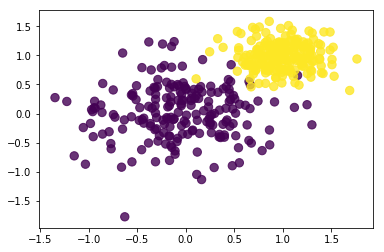

In [3]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

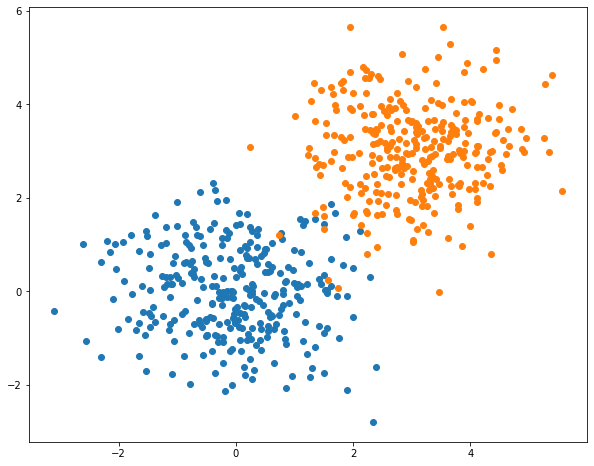

In [11]:
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [3, 3]
cov2 = [[1, 0], [0, 1]]

x1, y1 = np.random.multivariate_normal(mean1, cov1, N).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, N).T

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x1, y1)
ax.scatter(x2, y2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

<ErrorbarContainer object of 3 artists>

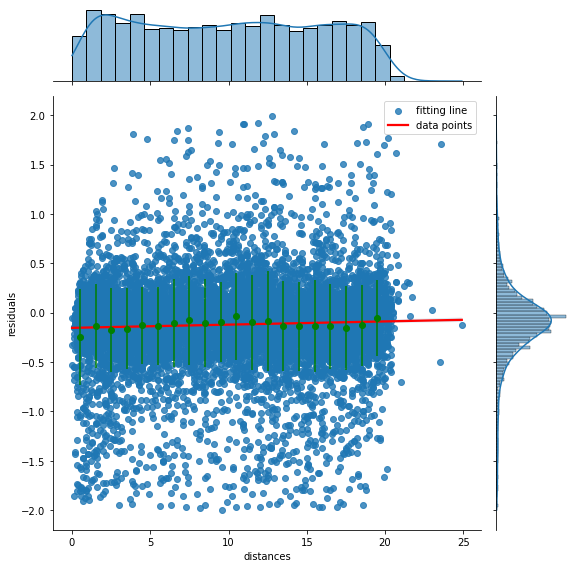

In [64]:
# ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
import pandas as pd
from scipy import stats
import seaborn as sns

data = np.load("residuals_261.npy",allow_pickle=True)
df = pd.DataFrame(data.item())

df = df[abs(df['residuals']) < 2]

res = stats.linregress(df['distances'], df['residuals'])

scatter = sns.jointplot(data=df, x='distances', y='residuals', kind='reg', height = 8)
regline = scatter.ax_joint.get_lines()[0]
regline.set_color('red')
scatter.ax_joint.legend(["fitting line","data points"])

bin_heights, bin_edges = np.histogram(df['distances'], bins=20, range=(0,20))

x = (bin_edges[1:] + bin_edges[:-1]) / 2

y = np.array([])
erry = np.array([])

for i in range(len(bin_edges)-1):
    df_bin = df[(df['distances']>=bin_edges[i]) & (df['distances']<bin_edges[i+1])]
    y = np.append(y, df_bin['residuals'].mean())
    erry = np.append(erry, df_bin['residuals'].std())

scatter.ax_joint.errorbar(x, y, erry, fmt='og')